# FINAL PROJECT

## Introduction

## Import Libraries

Install dan import libraries yang digunakan.

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

## Data Loading

In [49]:
data = pd.read_csv('E:\Cool Yeah\Hacktiv8\Final-Project_Kelompok4\Data\\rideshare_kaggle.csv')

Memanggil bagian kepala data.

In [50]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Memanggil bagian ekor data.

In [51]:
data.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Mengecek dimensi data.

In [12]:
data.shape

(693071, 57)

Mengecek info dataset.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Mengecek tipe data apa saja yg ada pada variabel.

In [16]:
data.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [17]:
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [18]:
categorical_cols=data.columns[data.dtypes =='object']
print(categorical_cols)

Index(['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')


In [19]:
data.source.value_counts()

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

In [20]:
data.destination.value_counts()

Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64

In [21]:
data.cab_type.value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [22]:
data.product_id.value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

In [23]:
data.name.value_counts()

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

In [135]:
data.short_summary.value_counts()

 Overcast             218895
 Mostly Cloudy        146210
 Partly Cloudy        127224
 Clear                 87126
 Light Rain            54912
 Rain                  23712
 Possible Drizzle      18636
 Foggy                  9060
 Drizzle                7296
Name: short_summary, dtype: int64

In [136]:
data.long_summary.value_counts()

 Mostly cloudy throughout the day.                      202340
 Partly cloudy throughout the day.                      145279
 Light rain in the morning.                             102485
 Rain throughout the day.                                54288
 Light rain in the morning and overnight.                50544
 Rain until morning, starting again in the evening.      47931
 Foggy in the morning.                                   44772
 Light rain until evening.                               35568
 Overcast throughout the day.                             7488
 Possible drizzle in the morning.                         1872
 Rain in the morning and afternoon.                        504
Name: long_summary, dtype: int64

In [137]:
data.icon.value_counts()

 cloudy                  218895
 partly-cloudy-night     158030
 partly-cloudy-day       115404
 rain                    104556
 clear-night              60294
 clear-day                26832
 fog                       9060
Name: icon, dtype: int64

## Data Cleaning

Mengecek jumlah data yang memiliki duplicate.

In [40]:
data.duplicated().sum()

0

Mengecek apakah masih terdapat data duplicated pada data dan hasilnya tidak ada.

In [41]:
data.duplicated().value_counts()

False    693071
dtype: int64

Menghapus kolom yang tidak dibutuhkan.

In [52]:
data2 = data.drop(['id', 'datetime', 'timezone', 'timestamp','latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',"product_id",
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'], axis=1)

In [139]:
data2

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...,...,...,...
693066,23,1,12,West End,North End,Uber,UberXL,13.0,1.00,1.0
693067,23,1,12,West End,North End,Uber,UberX,9.5,1.00,1.0
693068,23,1,12,West End,North End,Uber,Taxi,NaN,1.00,1.0
693069,23,1,12,West End,North End,Uber,Black SUV,27.0,1.00,1.0


### NAN Value

Mengecek apakah ada data yang null.

In [53]:
data2.isna().sum()

hour                    0
day                     0
month                   0
source                  0
destination             0
cab_type                0
name                    0
price               55095
distance                0
surge_multiplier        0
dtype: int64

In [54]:
data2.price.fillna(data2.price.mean(), inplace=True)
data2.isna().sum()

hour                0
day                 0
month               0
source              0
destination         0
cab_type            0
name                0
price               0
distance            0
surge_multiplier    0
dtype: int64

## Data Exploration

### Mengecek Outlier

<AxesSubplot:xlabel='distance'>

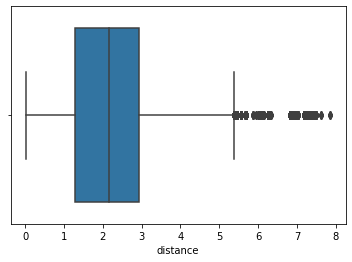

In [141]:
sns.boxplot(x=data2['distance'])

<AxesSubplot:xlabel='price'>

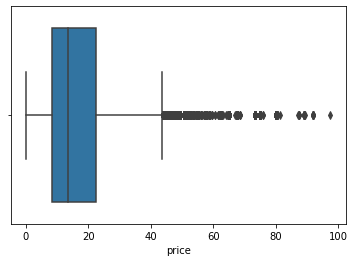

In [142]:
sns.boxplot(x=data2['price'])

<AxesSubplot:xlabel='distance'>

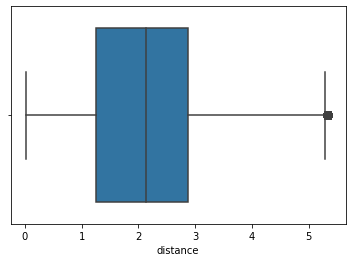

In [143]:
Q1 = data2['distance'].quantile(0.25)
Q3 = data2['distance'].quantile(0.75)
IQR = Q3 - Q1
data2 = data2[~((data2['distance'] < (Q1 - 1.5 * IQR)) | (data2['distance']  > (Q3 + 1.5 * IQR)))]
sns.boxplot(x=data2['distance'])

<AxesSubplot:xlabel='price'>

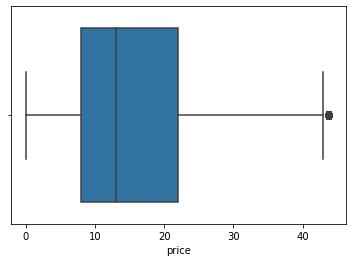

In [144]:
Q1 = data2['price'].quantile(0.25)
Q3 = data2['price'].quantile(0.75)
IQR = Q3 - Q1
data2 = data2[~((data2['price']< (Q1 - 1.5 * IQR)) | (data2['price'] > (Q3 + 1.5 * IQR)))]
sns.boxplot(x=data2['price'])

In [55]:
data3 = data2.drop(['hour','day','month','source','destination'],axis=1)
data3.head()

,cab_type,name,price,distance,surge_multiplier
0,Lyft,Shared,5.0,0.44,1.0
1,Lyft,Lux,11.0,0.44,1.0
2,Lyft,Lyft,7.0,0.44,1.0
3,Lyft,Lux Black XL,26.0,0.44,1.0
4,Lyft,Lyft XL,9.0,0.44,1.0


## Data Preprocessing

### Normality Check Target

<AxesSubplot:>

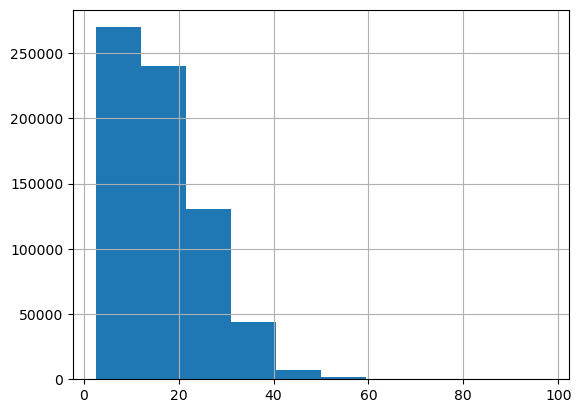

In [56]:
data3.price.hist()

In [57]:
data3.price = np.log(data3.price.dropna())

<AxesSubplot:>

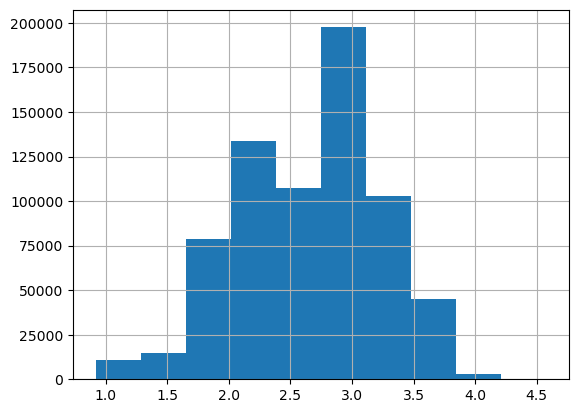

In [58]:
data3.price.hist()

In [59]:
stat, p = scipy.stats.shapiro(data3.price)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.982, p=0.000
Probably not Gaussian


D:\Application\Anaconda\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Encoding

Mengubah label data kategorik menjadi numerik menggunakan label Encoder.

In [60]:
data3['cab_type'] = LabelEncoder().fit_transform(data3['cab_type'])
data3['name'] = LabelEncoder().fit_transform(data3['name'])

In [61]:
data3.columns

Index(['cab_type', 'name', 'price', 'distance', 'surge_multiplier'], dtype='object')

In [62]:
data3

,cab_type,name,price,distance,surge_multiplier
0,0,7,1.609438,0.44,1.0
1,0,2,2.397895,0.44,1.0
2,0,5,1.945910,0.44,1.0
3,0,4,3.258097,0.44,1.0
4,0,6,2.197225,0.44,1.0
...,...,...,...,...,...
693066,1,11,2.564949,1.00,1.0
693067,1,10,2.251292,1.00,1.0
693068,1,8,2.806092,1.00,1.0
693069,1,1,3.295837,1.00,1.0


### Split Data

In [63]:
x = data3.drop(['price'], axis = 1) 
y = data3.loc[:,'price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=33, shuffle =True)# Membagi data menjadi dua

Dalam hal ini dilakukan pemisahan data dengan ukuran data testing adalah 30% dan ukuran data training adalah 70%  yang diambil secara acak dengan nomor generator 1. Nomor ini menandakan nomor pengacakan agar jika di run kembali, pengacakan data akan tetap sama. Data training (X_train, Y_train) berguna untuk membangun model yang hasilnya akan digunakan untuk memprediksi X_test, kemudian hasil prediksinya dievaluasi dengan mengacu pada Y_test

In [64]:
x

,cab_type,name,distance,surge_multiplier
0,0,7,0.44,1.0
1,0,2,0.44,1.0
2,0,5,0.44,1.0
3,0,4,0.44,1.0
4,0,6,0.44,1.0
...,...,...,...,...
693066,1,11,1.00,1.0
693067,1,10,1.00,1.0
693068,1,8,1.00,1.0
693069,1,1,1.00,1.0


In [65]:
y

0         1.609438
1         2.397895
2         1.945910
3         3.258097
4         2.197225
            ...   
693066    2.564949
693067    2.251292
693068    2.806092
693069    3.295837
693070    2.302585
Name: price, Length: 693071, dtype: float64

## Model Definition

## Model Training

### Create a model and fit it

In [66]:
linr_model = LinearRegression()
linr_model.fit(x_train, y_train)

LinearRegression()

### Get results

In [67]:
r_sq = linr_model.score(x_test, y_test)

print('coefficient of determination : ', r_sq)
print('intercept : ', linr_model.intercept_)
print('slope : ', linr_model.coef_)

coefficient of determination :  0.47985701540366965
intercept :  1.7873854082146587
slope :  [ 0.26218644 -0.0921036   0.15328122  0.93728662]


## Model Evaluation

In [68]:
y_pred = linr_model.predict(x_test)
print('predicted response: ', y_pred, sep='\n')

predicted response: 
[2.18877649 3.70327344 2.38798276 ... 2.19444382 2.45548581 2.24223073]


In [69]:
y_pred = linr_model.intercept_ + np.sum(linr_model.coef_ * x_test, axis=1)
print('predicted response: ', y_pred, sep='\n')

predicted response: 
509450    2.188776
39722     3.703273
128947    2.387983
142691    2.908340
247990    2.541863
            ...   
66917     2.805372
534720    3.322409
214097    2.194444
106415    2.455486
246405    2.242231
Length: 103961, dtype: float64


## Model Inference

## Kesimpulan